


































# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing dataset**

In [ ]:
dataset = pd.read_csv('heart_cleveland_upload.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# renaming features to proper name
dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'VCA', 'thallium', 'target']

dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,VCA,thallium,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# **Data Preparation and Preprocessing**

In [ ]:
# converting features to categorical features

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'



dataset['rest_ecg'][dataset['rest_ecg'] == 0] = 'normal'
dataset['rest_ecg'][dataset['rest_ecg'] == 1] = 'ST-T wave abnormality'
dataset['rest_ecg'][dataset['rest_ecg'] == 2] = 'left ventricular hypertrophy'


#dataset['st_slope'][dataset['st_slope'] == 0] = 'normal'
dataset['st_slope'][dataset['st_slope'] == 0] = 'upsloping'
dataset['st_slope'][dataset['st_slope'] == 1] = 'flat'
dataset['st_slope'][dataset['st_slope'] == 2] = 'downsloping'

dataset["sex"] = dataset.sex.apply(lambda  x:'male' if x==1 else 'female')

dataset['VCA'][dataset['VCA'] == 0] ='zero'
dataset['VCA'][dataset['VCA'] == 1] ='one'
dataset['VCA'][dataset['VCA'] == 2] ='two'
dataset['VCA'][dataset['VCA'] == 3] ='three'

dataset['thallium'][dataset['thallium'] == 0] ='normal'
dataset['thallium'][dataset['thallium'] == 1] ='fixed defect'
dataset['thallium'][dataset['thallium'] == 2] ='reversible defect'

# checking the top 5 entries of dataset after feature encoding
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,VCA,thallium,target
0,69,male,typical angina,160,234,1,left ventricular hypertrophy,131,0,0.1,flat,one,normal,0
1,69,female,typical angina,140,239,0,normal,151,0,1.8,upsloping,two,normal,0
2,66,female,typical angina,150,226,0,normal,114,0,2.6,downsloping,zero,normal,0
3,65,male,typical angina,138,282,1,left ventricular hypertrophy,174,0,1.4,flat,one,normal,1
4,64,male,typical angina,110,211,0,left ventricular hypertrophy,144,1,1.8,flat,zero,normal,0


In [ ]:
X1 = dataset.iloc[:, :-1].values
y1 = dataset.iloc[:, -1].values
print(type(X1))
print(X1)
print(y1)

<class 'numpy.ndarray'>
[[69 'male' 'typical angina' ... 'flat' 'one' 'normal']
 [69 'female' 'typical angina' ... 'upsloping' 'two' 'normal']
 [66 'female' 'typical angina' ... 'downsloping' 'zero' 'normal']
 ...
 [35 'male' 'asymptomatic' ... 'flat' 'zero' 'reversible defect']
 [35 'female' 'asymptomatic' ... 'upsloping' 'zero' 'normal']
 [35 'male' 'asymptomatic' ... 'upsloping' 'zero' 'reversible defect']]
[0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 

**Handling Missing data**

In [ ]:
print(dataset.shape)
dataset.dropna(inplace=True)
print(dataset.shape)
dataset.isnull().sum()


(297, 14)
(297, 14)


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
VCA                        0
thallium                   0
target                     0
dtype: int64

#**Exploratory Data Analysis (EDA)**

 EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis.

In [ ]:
# summary statistics of numerical columns
dataset.describe(include =[np.number])

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,0.144781,149.599327,0.326599,1.055556,0.461279
std,9.049736,17.762806,51.997583,0.352474,22.941562,0.469761,1.166123,0.499340
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,0.000000,153.000000,0.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,0.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
# summary statistics of categorical columns
dataset.describe(include =[np.object])

,sex,chest_pain_type,rest_ecg,st_slope,VCA,thallium
count,297,297,297,297,297,297
unique,2,4,3,3,4,3
top,male,asymptomatic,normal,upsloping,zero,normal
freq,201,142,147,139,174,164


**Distribution of Heart disease (target variable)**

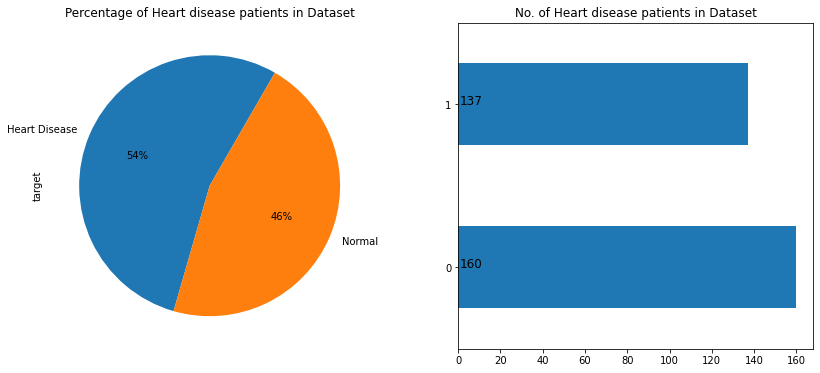

In [ ]:
# Plotting attrition of patients
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = dataset["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(dataset["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

The dataset is balanced having 137 heart disease patients and 160 normal patients

**Checking Gender & Agewise Distribution**

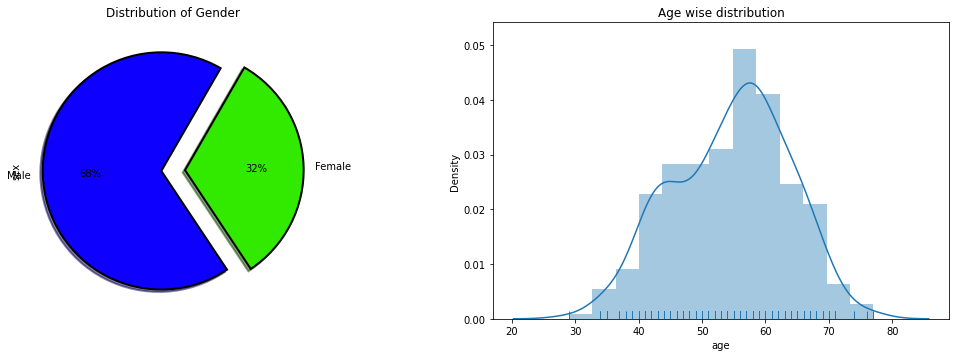

In [ ]:
import seaborn as sns
plt.figure(figsize=(18,12))
plt.subplot(221)
dataset["sex"].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],

wedgeprops={"linewidth":2, "edgecolor":"k"}, explode=[.1,.1], shadow =True) 
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(dataset['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is higher than females where as average age of patients is around 58.

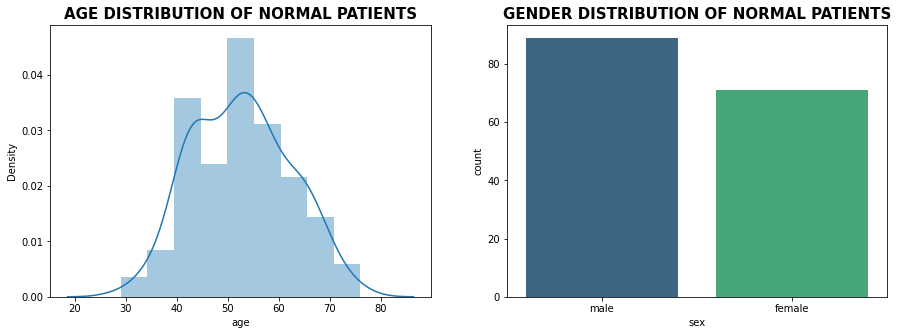

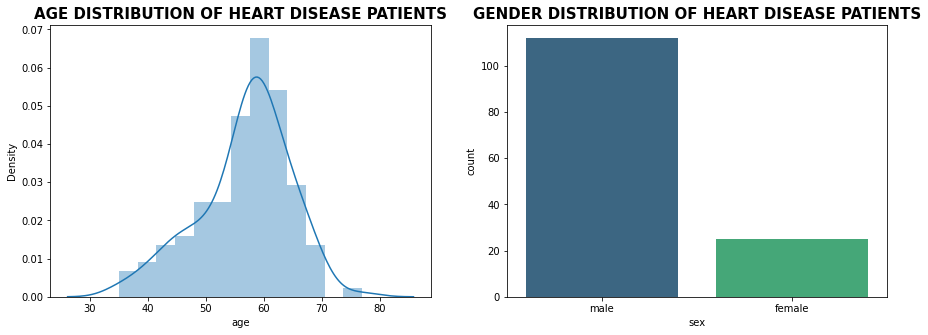

In [ ]:
attr_1=dataset[dataset['target']==1]
attr_0=dataset[dataset['target']==0]
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

As we can see from above plot **Male** patients accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 59 years

**Distribution of Chest Pain Type**

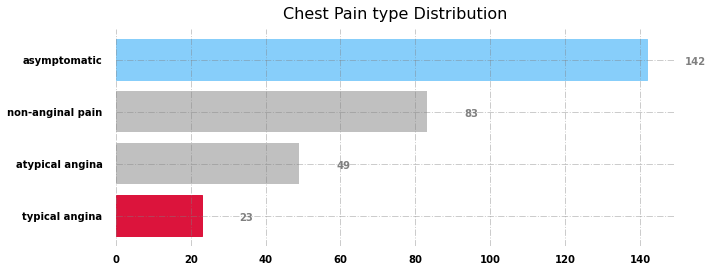

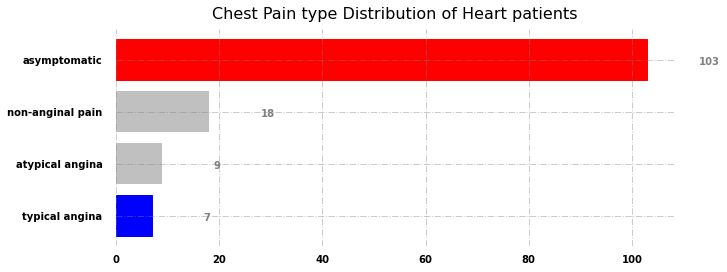

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=dataset.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[3].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.chest_pain_type.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[3].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Chest Pain type Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on Chest Pain Type

plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round (pd.crosstab( dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
chest_pain_type,,
asymptomatic,24.380000,75.180000
atypical angina,25.000000,6.570000
non-anginal pain,40.620000,13.140000
typical angina,10.000000,5.110000


As we can see from above plot 75% of the chest pain type of the heart disease patients have asymptomatic chest pain.

Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments and even premature deaths in India. The incidences among middle aged people experiencing SMI is twice likely to develop in males than females. The symptoms of SMI being very mild in comparison to an actual heart attack; it is described as a silent killer. Unlike the symptoms in a normal heart attack which includes extreme chest pain, stabbing pain in the arms, neck & jaw, sudden shortness of breath, sweating and dizziness, the symptoms of SMI are very brief and hence confused with regular discomfort and most often ignored.

**Distribution of Rest ECG**

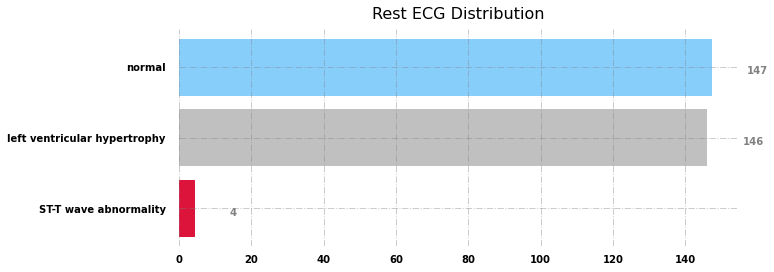

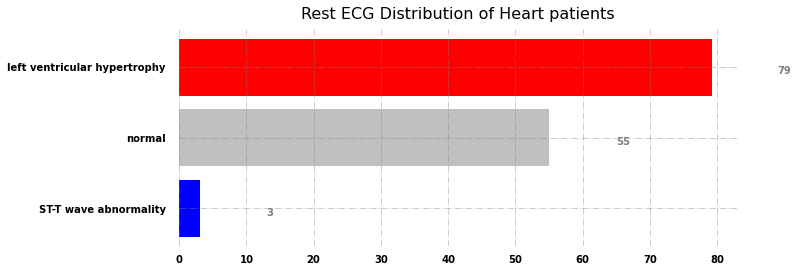

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt = dataset.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight ='bold', color ='grey')
plt.yticks(weight ='bold')
plt.xticks(weight ='bold')
# Show Plot
plt.show()


fig, ax = plt.subplots(figsize =(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.rest_ecg.value_counts().sort_values(ascending=False).reset_index()
mn = ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b =True, color ='grey', linestyle ='-.', linewidth =1, alpha =0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Rest ECG Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+ 10, i.get_y()+ 0.5, str(round((i.get_width()), 2)),
            fontsize= 10, fontweight= 'bold', color= 'grey')
plt.yticks(weight= 'bold')
plt.xticks(weight= 'bold')
# Show Plot
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round( pd.crosstab( dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
rest_ecg,,
ST-T wave abnormality,0.620000,2.190000
left ventricular hypertrophy,41.880000,57.660000
normal,57.500000,40.150000


An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs, but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 40% heart disease patients have normal ECG

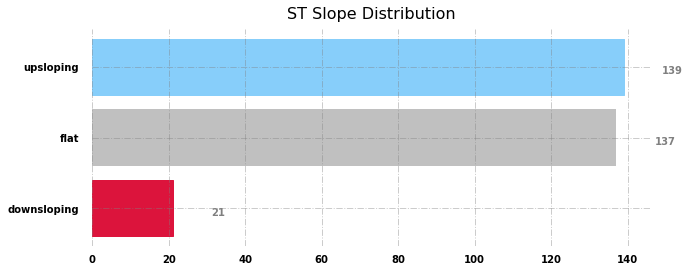

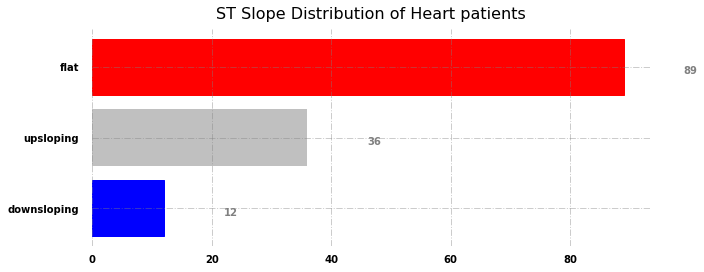

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt = dataset.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[2].set_color('crimson') #3


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution', loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.st_slope.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[2].set_color('blue') #3


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('ST Slope Distribution of Heart patients',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

In [ ]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round( pd.crosstab( dataset[plot_criteria[0]], dataset[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
st_slope,,
downsloping,5.620000,8.760000
flat,30.000000,64.960000
upsloping,64.380000,26.280000


The ST segment /heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD) in most of the research papers.

As we can see from above plot upsloping is positive sign as **64%** of the **normal patients have upslope** where as **64.96% heart patients** have flat sloping.

**Distribution of Numerical features**

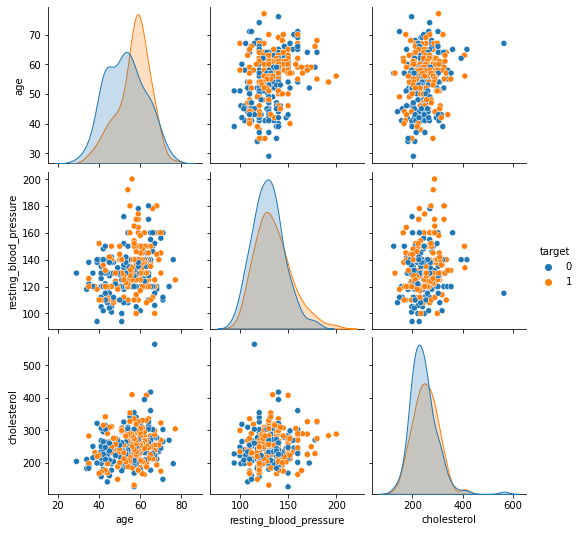

In [ ]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

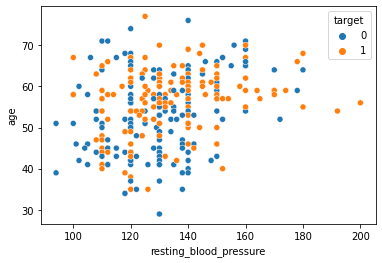

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = dataset)

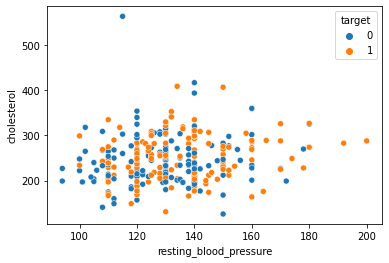

In [ ]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = dataset)

From the above plots we can see outliers clearly as for some of the patients.

# **Encoding categorical variables**

In [ ]:
#Dummy encoding variable


dataset = pd.get_dummies(dataset, drop_first=True)
#dataset.head()
dataset.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
0,69,160,234,1,131,0,0.1,0,1,0,0,1,1,0,1,0,0,0,0,1,0
1,69,140,239,0,151,0,1.8,0,0,0,0,1,0,1,0,1,0,1,0,1,0
2,66,150,226,0,114,0,2.6,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,65,138,282,1,174,0,1.4,1,1,0,0,1,1,0,1,0,0,0,0,1,0
4,64,110,211,0,144,1,1.8,0,1,0,0,1,1,0,1,0,0,0,1,1,0


In [ ]:
dataset.shape

(297, 21)

In [ ]:
X = dataset.drop(['target'],axis=1)
y = dataset['target']

# **Train Test Split**

**Splitting the dataset into Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.2, random_state=0)

X_train_std = X_train
X_test_std = X_test
y_train_std = y_train
y_test_std = y_test

X_train_norm = X_train
X_test_norm = X_test
y_train_norm = y_train
y_test_norm = y_test

In [ ]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
282,43,120,177,0,120,1,2.5,1,0,0,0,1,0,1,0,0,0,1,0,1
81,67,152,277,0,172,0,0.0,0,0,1,0,0,1,0,1,0,0,0,1,0
108,54,120,258,0,147,0,0.4,1,0,1,0,1,0,1,0,0,0,1,0,1
146,42,130,180,0,150,0,0.0,1,0,1,0,0,1,0,1,0,0,1,1,0
217,58,146,218,0,105,0,2.0,1,0,0,0,0,1,1,0,0,0,0,0,1


In [ ]:
y_train.head()

282    1
81     0
108    0
146    0
217    1
Name: target, dtype: int64

In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(237, 20)
(237,)
------------Test Set------------------
(60, 20)
(60,)


In [ ]:
#print(y_train)

In [ ]:
#print(X_test)

In [ ]:
#print(y_test)

# Feature Scaling

**Standard Scaling #standardization**

In [ ]:
''' # not needed
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
print(type(X_train))
'''

' # not needed\nX_train = X_train.to_numpy()\ny_train = y_train.to_numpy()\nX_test = X_test.to_numpy()\ny_test = y_test.to_numpy()\nprint(type(X_train))\n'

In [ ]:

# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler1 = StandardScaler()

X_train_std[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler1.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train_std.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
282,-1.289717,-0.667662,-1.297100,0,-1.317341,1,1.251440,1,0,0,0,1,0,1,0,0,0,1,0,1
81,1.345308,1.203568,0.507706,0,0.984503,0,-0.899019,0,0,1,0,0,1,0,1,0,0,0,1,0
108,-0.081997,-0.667662,0.164793,0,-0.122152,0,-0.554945,1,0,1,0,1,0,1,0,0,0,1,0,1
146,-1.399509,-0.082903,-1.242955,0,0.010646,0,-0.899019,1,0,1,0,0,1,0,1,0,0,1,1,0
217,0.357174,0.852713,-0.557129,0,-1.981334,0,0.821348,1,0,0,0,0,1,1,0,0,0,0,0,1


In [ ]:

X_test_std[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler1.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test_std.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
111,-0.081997,1.086617,-0.304456,0,0.674640,0,0.477275,1,0,1,0,1,0,0,1,0,0,1,0,1
150,-1.728888,0.384905,-0.521033,0,0.099179,0,-0.899019,0,0,1,0,0,1,1,0,0,0,1,1,0
12,0.466966,0.151001,-0.809802,0,0.541841,0,-0.210872,1,0,0,1,0,1,0,1,0,1,0,1,0
216,0.357174,-0.199855,0.182841,0,-0.874678,1,1.681531,1,0,0,0,1,0,1,0,0,1,0,0,1
139,-1.179924,-0.082903,-0.286408,0,1.294367,1,-0.554945,1,0,1,0,0,1,0,1,0,0,1,1,0


**Minmax Scaling #Normalization**

In [ ]:

# import module
from sklearn.preprocessing import MinMaxScaler

# compute required values
scaler2 = MinMaxScaler()

X_train_norm[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler2.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_train_norm.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
282,0.291667,0.302326,0.116438,0,0.374046,1,0.403226,1,0,0,0,1,0,1,0,0,0,1,0,1
81,0.791667,0.674419,0.344749,0,0.770992,0,0.000000,0,0,1,0,0,1,0,1,0,0,0,1,0
108,0.520833,0.302326,0.301370,0,0.580153,0,0.064516,1,0,1,0,1,0,1,0,0,0,1,0,1
146,0.270833,0.418605,0.123288,0,0.603053,0,0.000000,1,0,1,0,0,1,0,1,0,0,1,1,0
217,0.604167,0.604651,0.210046,0,0.259542,0,0.322581,1,0,0,0,0,1,1,0,0,0,0,0,1


In [ ]:

X_test_norm[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']] = scaler2.transform(X_test[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']])
X_test_norm.head()


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,st_slope_flat,st_slope_upsloping,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
111,0.520833,0.651163,0.242009,0,0.717557,0,0.258065,1,0,1,0,1,0,0,1,0,0,1,0,1
150,0.208333,0.511628,0.214612,0,0.618321,0,0.000000,0,0,1,0,0,1,1,0,0,0,1,1,0
12,0.625000,0.465116,0.178082,0,0.694656,0,0.129032,1,0,0,1,0,1,0,1,0,1,0,1,0
216,0.604167,0.395349,0.303653,0,0.450382,1,0.483871,1,0,0,0,1,0,1,0,0,1,0,0,1
139,0.312500,0.418605,0.244292,0,0.824427,1,0.064516,1,0,1,0,0,1,0,1,0,0,1,1,0


# Classification

**Importing Evaluation metrics**

In [ ]:
from sklearn.metrics import *

### Cross Validation

In [ ]:
pip install logitboost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from logitboost import LogitBoost
from sklearn.svm import SVC 
import xgboost as xgb

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# function initializing machine learning models
def GetModels():
    Models = []
    Models.append(('LR_L2'   , LogisticRegression(penalty='l2')))

    Models.append(('CART' , DecisionTreeClassifier()))
    #Models.append(('Categorical NB'   , CategoricalNB()))
    Models.append(('Gaussian NB'   , GaussianNB()))
    Models.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    Models.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))

    Models.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    Models.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))

    #Models.append(('Multi-layer Perceptron', MLPClassifier()))
    Models.append(('AdaBoost'   , AdaBoostClassifier()))
    Models.append(('LogitBoost'   , LogitBoost(n_estimators=200)))
    Models.append(('GradientBoostingClassifier' , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))

    
    
    return Models

# function for performing 10-fold cross validation of all the models
def crossValidation_k10(X_train_std, y_train_std,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = ('accuracy','recall','precision')
    #seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)         #, random_state=seed)
        #cv_results = model_selection.cross_val_score(model, X_train, yls:_train, cv=kfold, scoring=scoring)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        
        mean_accuracy = cv_results['test_accuracy'].mean()
        std_accuracy = cv_results['test_accuracy'].std()
        mean_recall = cv_results['test_recall'].mean()
        std_recall = cv_results['test_recall'].std()
        mean_precision = cv_results['test_precision'].mean()
        std_precision = cv_results['test_precision'].std()
        print('\n --------------------',name,'----------------------')
        #print(cv_results)
        print('Accuracy (Mean, Std): (', mean_accuracy,',',std_accuracy,')')
        print('Recall (Mean, Std): (', mean_recall,',',std_recall,')')
        print('Precision (Mean, Std): (', mean_precision,',',std_precision,')')
         
        
    return results

In [ ]:
models = GetModels()
#results = crossValidation_k10(X_train_std, y_train_std,models)

## ***Classification of test dataset***

In [ ]:
classifier_names=[]
model_accuracy=[]
for name, model in models:
  classifier_test = model
  classifier_test.fit(X_train_std, y_train_std)
  y_pred = classifier_test.predict(X_test_std)
  cm = confusion_matrix(y_test_std, y_pred)
  print('----------------------',name,'-----------------------')
  print('Confusion matrix: \n', cm)
  classifier_names.append(name)
  model_accuracy.append(accuracy_score(y_test_std, y_pred))
  print('Accuracy: ', accuracy_score(y_test_std, y_pred))
  print('Classification Report:\n ', classification_report(y_test_std, y_pred))

---------------------- LR_L2 -----------------------
Confusion matrix: 
 [[20  2]
 [ 7 31]]
Accuracy:  0.85
Classification Report:
                precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.94      0.82      0.87        38

    accuracy                           0.85        60
   macro avg       0.84      0.86      0.84        60
weighted avg       0.87      0.85      0.85        60

---------------------- CART -----------------------
Confusion matrix: 
 [[13  9]
 [14 24]]
Accuracy:  0.6166666666666667
Classification Report:
                precision    recall  f1-score   support

           0       0.48      0.59      0.53        22
           1       0.73      0.63      0.68        38

    accuracy                           0.62        60
   macro avg       0.60      0.61      0.60        60
weighted avg       0.64      0.62      0.62        60

---------------------- Gaussian NB -----------------------
Confusio

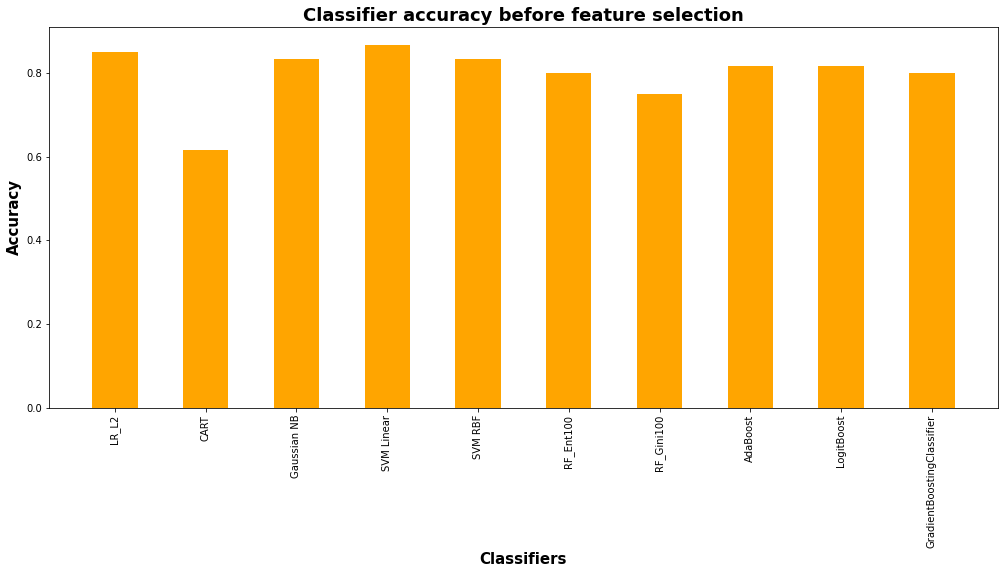

In [ ]:
fig = plt.figure(figsize = (17, 7))
plt.ylabel('Accuracy',fontweight ='bold', fontsize = 15)
plt.xlabel('Classifiers',fontweight ='bold', fontsize = 15)
plt.title('Classifier accuracy before feature selection',fontweight ='bold', fontsize = 18)

plt.bar(classifier_names, model_accuracy, color ='orange', width = 0.5)
plt.xticks(range(len(classifier_names)), classifier_names, rotation ='vertical')
plt.show()

# **Feature Selection with GA**

In [ ]:
pip install sklearn-genetic

Stacking classifier : NB and SVM

In [ ]:
from sklearn.ensemble import StackingClassifier
#NB = Categorical or gaussian && svm-- rbf/linear
estimators = [('NB', GaussianNB()),('SVM', SVC(kernel='rbf',gamma='auto',probability=True))]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(penalty='l2')) 
#LogisticRegression Accuracy: 0.8333333333333334

In [ ]:
stack_clf.fit(X_train_std, y_train_std)
'''
y_pred = stack_clf.predict(X_test_std)
cm = confusion_matrix(y_test_std, y_pred)
print('----------------------Stacking classifier-----------------------')
print('Confusion matrix: \n', cm)
print('Accuracy: ', accuracy_score(y_test_std, y_pred))
print('Classification Report:\n ', classification_report(y_test_std, y_pred))
'''

"\ny_pred = stack_clf.predict(X_test_std)\ncm = confusion_matrix(y_test_std, y_pred)\nprint('----------------------Stacking classifier-----------------------')\nprint('Confusion matrix: \n', cm)\nprint('Accuracy: ', accuracy_score(y_test_std, y_pred))\nprint('Classification Report:\n ', classification_report(y_test_std, y_pred))\n"

In [ ]:
from sklearn.inspection import permutation_importance  #mda
clf = GaussianNB().fit(X_train_std, y_train_std)
result = permutation_importance(clf, X_train_std, y_train_std, n_repeats=10)

feature_labels_all =['age','resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina', 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal', 'st_slope_flat', 'st_slope_upsloping', 'VCA_three', 'VCA_two', 'VCA_zero', 'thallium_normal', 'thallium_reversible defect']

importance = result.importances_mean
i=0
for j in importance:
    #print(feature_labels_all[i],":  ",j)
    i+=1
#print(result.importances_mean)
'''
# plot feature importance
fig = plt.figure(figsize = (17, 7))
plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Importances', fontweight ='bold', fontsize = 15)
plt.title('Permutation Importance of the features based on NB',fontweight ='bold', fontsize = 18)

plt.bar(feature_labels_all, importance)
plt.xticks(range(len(feature_labels_all)), feature_labels_all, rotation ='vertical')
plt.show()
'''

"\n# plot feature importance\nfig = plt.figure(figsize = (17, 7))\nplt.xlabel('Features', fontweight ='bold', fontsize = 15)\nplt.ylabel('Importances', fontweight ='bold', fontsize = 15)\nplt.title('Permutation Importance of the features based on NB',fontweight ='bold', fontsize = 18)\n\nplt.bar(feature_labels_all, importance)\nplt.xticks(range(len(feature_labels_all)), feature_labels_all, rotation ='vertical')\nplt.show()\n"

In [ ]:
from sklearn.inspection import permutation_importance  #mda
clf = SVC(kernel='rbf',gamma='auto',probability=True).fit(X_train_std, y_train_std)
result = permutation_importance(clf, X_train_std, y_train_std, n_repeats=10)

feature_labels_all =['age','resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina', 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal', 'st_slope_flat', 'st_slope_upsloping', 'VCA_three', 'VCA_two', 'VCA_zero', 'thallium_normal', 'thallium_reversible defect']
importance = result.importances_mean
i=0
for j in importance:
    #print(feature_labels_all[i],":  ",j)
    i+=1
#print(result.importances_mean)
'''
# plot feature importance
fig = plt.figure(figsize = (17, 7))
plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Importances', fontweight ='bold', fontsize = 15)
plt.title('Permutation Importance of the features based on SVM',fontweight ='bold', fontsize = 18)
plt.bar(feature_labels_all, importance)
plt.xticks(range(len(feature_labels_all)), feature_labels_all, rotation ='vertical')
plt.show()
'''

"\n# plot feature importance\nfig = plt.figure(figsize = (17, 7))\nplt.xlabel('Features', fontweight ='bold', fontsize = 15)\nplt.ylabel('Importances', fontweight ='bold', fontsize = 15)\nplt.title('Permutation Importance of the features based on SVM',fontweight ='bold', fontsize = 18)\nplt.bar(feature_labels_all, importance)\nplt.xticks(range(len(feature_labels_all)), feature_labels_all, rotation ='vertical')\nplt.show()\n"

age :   -0.0016877637130802037
resting_blood_pressure :   -0.0021097046413502407
cholesterol :   0.00042194092827002594
fasting_blood_sugar :   -0.0008438818565400963
max_heart_rate_achieved :   0.009282700421940926
exercise_induced_angina :   0.0037974683544303557
st_depression :   0.0016877637130801371
sex_male :   0.005063291139240478
chest_pain_type_atypical angina :   0.008438818565400819
chest_pain_type_non-anginal pain :   0.009704641350210952
chest_pain_type_typical angina :   0.028270042194092813
rest_ecg_left ventricular hypertrophy :   0.0016877637130801593
rest_ecg_normal :   0.0004219409282700148
st_slope_flat :   0.006329113924050622
st_slope_upsloping :   0.008438818565400807
VCA_three :   0.0362869198312236
VCA_two :   0.010126582278481
VCA_zero :   0.004641350210970452
thallium_normal :   0.010970464135021086
thallium_reversible defect :   0.011392405063291122


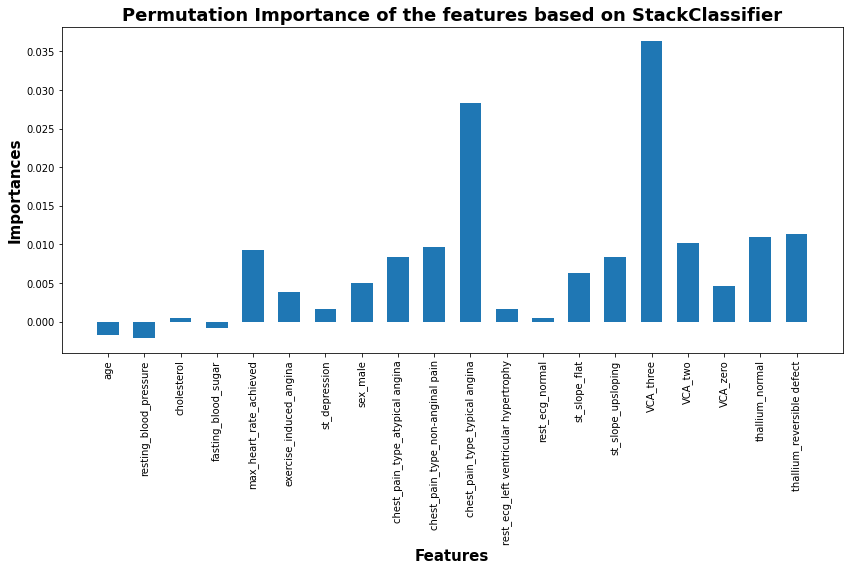

In [ ]:
from sklearn.inspection import permutation_importance  #mda
result = permutation_importance(stack_clf, X_train_std, y_train_std, n_repeats=10)

feature_labels_all =['age','resting_blood_pressure','cholesterol', 'fasting_blood_sugar', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'sex_male', 'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina', 'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal', 'st_slope_flat', 'st_slope_upsloping', 'VCA_three', 'VCA_two', 'VCA_zero', 'thallium_normal', 'thallium_reversible defect']
importance = result.importances_mean
i=0
for j in importance:
    print(feature_labels_all[i],":  ",j)
    i+=1
#print(result.importances_mean)
# plot feature importance
fig = plt.figure(figsize = (14, 6))

plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Importances', fontweight ='bold', fontsize = 15)
plt.title('Permutation Importance of the features based on StackClassifier',fontweight ='bold', fontsize = 18)

plt.bar(feature_labels_all, importance, width=0.6)
plt.xticks(range(len(feature_labels_all)), feature_labels_all, rotation ='vertical')
plt.show()

In [ ]:
# GeneticSelectionCV - "CV" itself finds the max no.of best features

from genetic_selection import GeneticSelectionCV

estimator =  DecisionTreeClassifier()
#estimator =  StackingClassifier(estimators=estimators, final_estimator=MLPClassifier())
#estimator = SVC(kernel='rbf',gamma='auto',probability=True)
#estimator = LogisticRegression(penalty='l2')
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=11,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.1,
    mutation_independent_proba=0.05,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1) #set to number of cores
model = model.fit(X_train_std, y_train_std)
#print('Features:', X_train_std.columns[model.support_])

Features: Index(['exercise_induced_angina', 'chest_pain_type_atypical angina',
       'rest_ecg_normal', 'VCA_zero', 'thallium_normal'],
      dtype='object')

In [ ]:
#print(model.generation_scores_) 

**SELECTED FEATURES : DECISION TREE**
Features: Index(['exercise_induced_angina', 'chest_pain_type_non-anginal pain',
       'rest_ecg_normal', 'VCA_zero', 'thallium_normal'],
      dtype='object')

## Modified dataset : with only selected features


In [ ]:
selected_features = ['exercise_induced_angina','chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal',
      'VCA_three', 'VCA_two', 'VCA_zero',
      'thallium_normal', 'thallium_reversible defect'] #
 

In [ ]:
X_train_std_fs =  X_train_std[selected_features]
X_test_std_fs = X_test_std[selected_features]

X_train_std_fs.head()


,exercise_induced_angina,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
282,1,0,0,0,1,0,0,0,1,0,1
81,0,0,1,0,0,1,0,0,0,1,0
108,0,0,1,0,1,0,0,0,1,0,1
146,0,0,1,0,0,1,0,0,1,1,0
217,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_test_std_fs.head()

,exercise_induced_angina,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,VCA_three,VCA_two,VCA_zero,thallium_normal,thallium_reversible defect
111,0,0,1,0,1,0,0,0,1,0,1
150,0,0,1,0,0,1,0,0,1,1,0
12,0,0,0,1,0,1,0,1,0,1,0
216,1,0,0,0,1,0,0,1,0,0,1
139,1,0,1,0,0,1,0,0,1,1,0


In [ ]:
X_train_norm_fs =  X_train_norm[selected_features]
X_test_norm_fs = X_test_norm[selected_features]

## Classification with selected features  

In [ ]:
model_accuracy_fs=[]
#classifier_names=[]
for name, model in models:
  classifier_test = model
  classifier_test.fit(X_train_std_fs, y_train_std)
  y_pred = classifier_test.predict(X_test_std_fs) ####
  cm = confusion_matrix(y_test_std, y_pred)
  print('----------------------',name,'-----------------------')
  print('Confusion matrix: \n', cm)
  #classifier_names.append(name)
  model_accuracy_fs.append(accuracy_score(y_test_std, y_pred))
  print('Accuracy: ', accuracy_score(y_test_std, y_pred))
  print('Classification Report:\n ', classification_report(y_test_std, y_pred))

---------------------- LR_L2 -----------------------
Confusion matrix: 
 [[21  1]
 [ 6 32]]
Accuracy:  0.8833333333333333
Classification Report:
                precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.97      0.84      0.90        38

    accuracy                           0.88        60
   macro avg       0.87      0.90      0.88        60
weighted avg       0.90      0.88      0.89        60

---------------------- CART -----------------------
Confusion matrix: 
 [[21  1]
 [ 9 29]]
Accuracy:  0.8333333333333334
Classification Report:
                precision    recall  f1-score   support

           0       0.70      0.95      0.81        22
           1       0.97      0.76      0.85        38

    accuracy                           0.83        60
   macro avg       0.83      0.86      0.83        60
weighted avg       0.87      0.83      0.84        60

---------------------- Gaussian NB ------------------

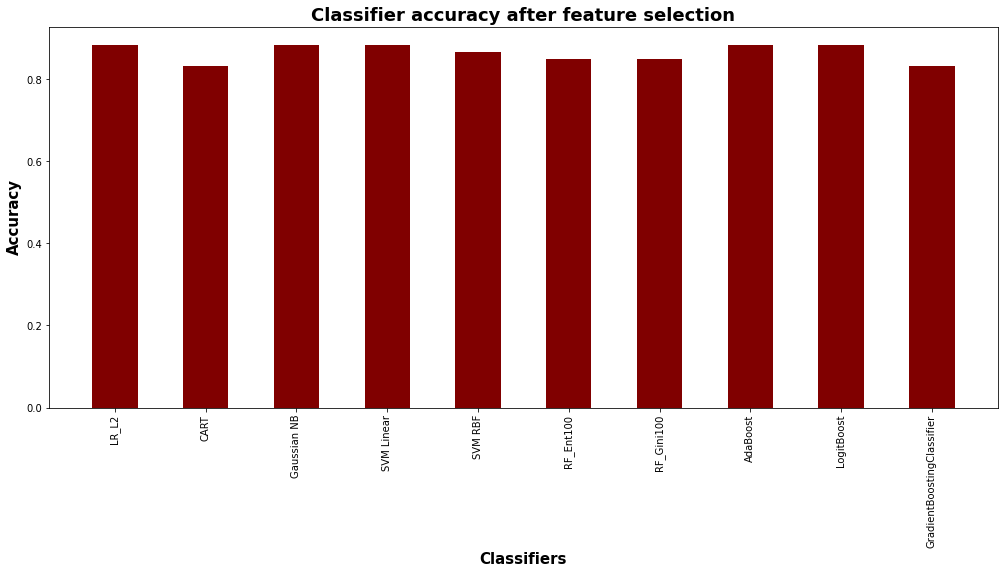

In [ ]:
fig = plt.figure(figsize = (17, 7))
plt.ylabel('Accuracy',fontweight ='bold', fontsize = 15)
plt.xlabel('Classifiers',fontweight ='bold', fontsize = 15)
plt.title('Classifier accuracy after feature selection',fontweight ='bold', fontsize = 18)

plt.bar(classifier_names, model_accuracy_fs, color ='maroon', width = 0.5)
plt.xticks(range(len(classifier_names)), classifier_names, rotation ='vertical')
plt.show()

In [ ]:
model_accuracy_diff=[] 
for i in range(len(model_accuracy)):
    model_accuracy_diff.append(model_accuracy_fs[i] - model_accuracy[i])
#print(model_accuracy_diff)    

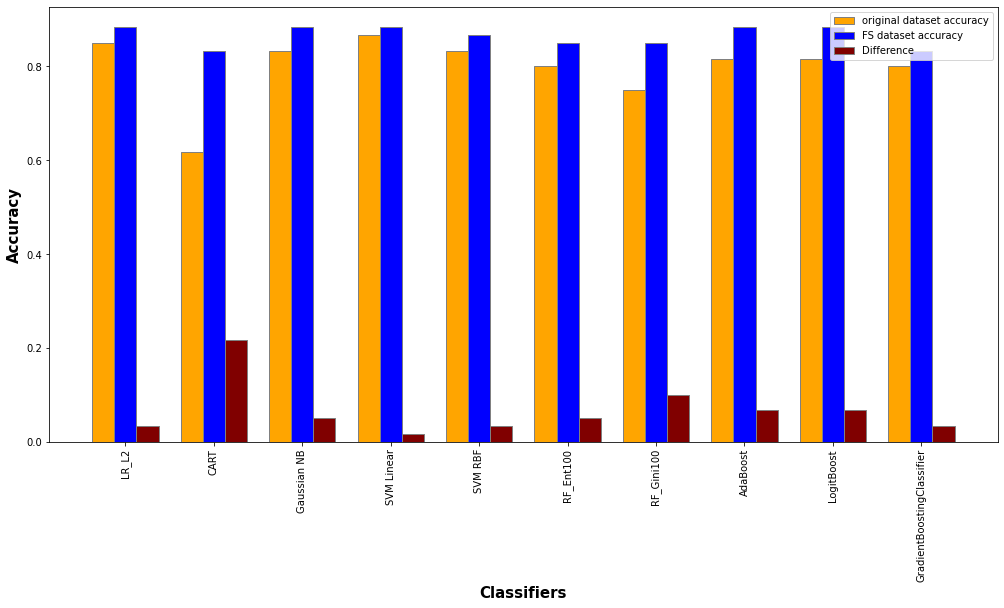

In [ ]:

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(17, 8))

#bar1 - model_accuracy
#bar2 -model_accuracy_fs
#bar3 - model_accuracy_diff
 
# Set position of bar on X axis
br1 = np.arange(len(model_accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, model_accuracy, color ='orange', width = barWidth,
        edgecolor ='grey', label ='original dataset accuracy')
plt.bar(br2, model_accuracy_fs, color ='blue', width = barWidth,
        edgecolor ='grey', label ='FS dataset accuracy')
plt.bar(br3, model_accuracy_diff, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Difference')
 
# Adding Xticks
plt.xlabel('Classifiers', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(classifier_names))],
        classifier_names, rotation ='vertical')
 
plt.legend()
plt.show()

## **Feature importances of the selected features**

In [ ]:
# after fs

stack_clf.fit(X_train_std_fs, y_train_std)
'''
y_pred = stack_clf.predict(X_test_std_fs)
cm = confusion_matrix(y_test_std, y_pred)
print('----------------------Stacking classifier-----------------------')
print('Confusion matrix: \n', cm)
print('Accuracy: ', accuracy_score(y_test_std, y_pred))
print('Classification Report:\n ', classification_report(y_test_std, y_pred))
'''

"\ny_pred = stack_clf.predict(X_test_std_fs)\ncm = confusion_matrix(y_test_std, y_pred)\nprint('----------------------Stacking classifier-----------------------')\nprint('Confusion matrix: \n', cm)\nprint('Accuracy: ', accuracy_score(y_test_std, y_pred))\nprint('Classification Report:\n ', classification_report(y_test_std, y_pred))\n"

exercise_induced_angina :   0.027848101265822777
chest_pain_type_atypical angina :   0.02742616033755274
chest_pain_type_non-anginal pain :   0.011392405063291144
chest_pain_type_typical angina :   0.010970464135021086
rest_ecg_left ventricular hypertrophy :   -0.0025316455696202224
rest_ecg_normal :   0.0004219409282700592
VCA_three :   0.024050632911392388
VCA_two :   0.003797468354430378
VCA_zero :   0.017721518987341766
thallium_normal :   0.011392405063291144
thallium_reversible defect :   0.01561181434599156


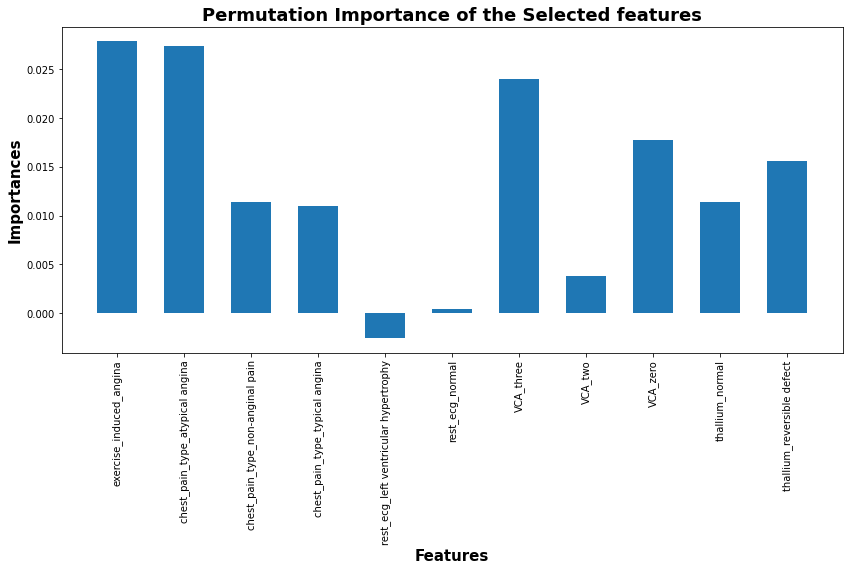

In [ ]:
result = permutation_importance(stack_clf, X_train_std_fs, y_train_std, n_repeats=10)

feature_labels_selected =['exercise_induced_angina','chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina', 
        'rest_ecg_left ventricular hypertrophy', 'rest_ecg_normal', 
        'VCA_three', 'VCA_two', 'VCA_zero',
        'thallium_normal', 'thallium_reversible defect']
importance = result.importances_mean
i=0
for j in importance:
    print(feature_labels_selected[i],":  ",j)
    i+=1
#print(result.importances_mean)
# plot feature importance
fig = plt.figure(figsize = (14, 6))

plt.xlabel('Features', fontweight ='bold', fontsize = 15)
plt.ylabel('Importances', fontweight ='bold', fontsize = 15)
plt.title('Permutation Importance of the Selected features',fontweight ='bold', fontsize = 18)

plt.bar(feature_labels_selected, importance, width = 0.6)
plt.xticks(range(len(feature_labels_selected)), feature_labels_selected, rotation ='vertical')
plt.show()

In [ ]:

'''
#print(zccc)
xTfs = X_train_std
xtfs = X_test_std

xtfs.shape
'''

'\n#print(zccc)\nxTfs = X_train_std\nxtfs = X_test_std\n\nxtfs.shape\n'

In [ ]:
'''
X_train_std = X_train_std_fs
X_test_std = X_test_std_fs

X_train_std_fs = xTfs
X_test_std_fs = xtfs
'''

'\nX_train_std = X_train_std_fs\nX_test_std = X_test_std_fs\n\nX_train_std_fs = xTfs\nX_test_std_fs = xtfs\n'

In [ ]:
X_train_std.shape

(237, 20)

In [ ]:
X_train_std_fs.shape

(237, 11)

In [ ]:
X_test_std.shape

(60, 20)

In [ ]:
X_test_std_fs.shape

(60, 11)

# **ANN classification**

In [ ]:
print(X_train_std.shape)
X_train_data = X_train_std.to_numpy()
X_test_data = X_test_std.to_numpy()
print('X_train_std',type(X_train_std),X_train_std.shape)
print('X_train_data',type(X_train_data), X_train_data.shape)
print('X_test_std',type(X_test_std),X_test_std.shape)
print('X_test_data',type(X_test_data),X_test_data.shape)

(237, 20)
X_train_std <class 'pandas.core.frame.DataFrame'> (237, 20)
X_train_data <class 'numpy.ndarray'> (237, 20)
X_test_std <class 'pandas.core.frame.DataFrame'> (60, 20)
X_test_data <class 'numpy.ndarray'> (60, 20)


In [ ]:
print(X_train_data.shape)
print(X_train_data[0].shape)
print(X_train_data[0])

(237, 20)
(20,)
[0.29166667 0.30232558 0.11643836 0.         0.3740458  1.
 0.40322581 1.         0.         0.         0.         1.
 0.         1.         0.         0.         0.         1.
 0.         1.        ]


In [ ]:
print(X_train_std_fs.shape)
X_train_data_fs = X_train_std_fs.to_numpy()
X_test_data_fs = X_test_std_fs.to_numpy()
print('X_train_std_fs',type(X_train_std_fs),X_train_std_fs.shape)
print('X_train_data_fs',type(X_train_data_fs), X_train_data_fs.shape)
print('X_test_std_fs',type(X_test_std_fs),X_test_std_fs.shape)
print('X_test_data_fs',type(X_test_data_fs),X_test_data_fs.shape)

(237, 11)
X_train_std_fs <class 'pandas.core.frame.DataFrame'> (237, 11)
X_train_data_fs <class 'numpy.ndarray'> (237, 11)
X_test_std_fs <class 'pandas.core.frame.DataFrame'> (60, 11)
X_test_data_fs <class 'numpy.ndarray'> (60, 11)


In [ ]:
print(X_train_data_fs.shape)
print(X_train_data_fs[0].shape)
print(X_train_data_fs[0])

(237, 11)
(11,)
[1 0 0 0 1 0 0 0 1 0 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Conv1D,MaxPooling1D,Flatten

In [ ]:
EPOCHS =100
y_train_label = y_train_std.to_numpy()

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_accuracy", 
                                        mode ="auto", patience = 15, 
                                        restore_best_weights = True)

In [ ]:
#   model.add(Dense(32,activation='relu', name="Dense_1"))
#   model.add(Dropout(0.2))
#   model.add(Dense(16, activation='relu', name="Dense_2"))
#   model.add(Dropout(0.2))
#   model.add(Dense(8, activation='relu', name="Dense_3"))

In [ ]:
def build_ann_model(input_shape):
   
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(32,activation='relu', name="Dense_1"))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', name="Dense_2"))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', name="Dense_3"))
    '''
    model1 = Sequential()
    model1.add(Input(shape=(input_shape,)))  ####
    model1.add(Dense(25,activation='relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(13,activation='relu'))
    model1.add(Dropout(0.2))
    '''

    #output layer
    model.add(Dense(1,activation='sigmoid')) 
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) #adam
    return model

model_ann = build_ann_model(X_train_data.shape[1]) #20
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 32)                672       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 Dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 Dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainabl

In [ ]:
history = model_ann.fit(X_train_data, y_train_label, epochs=EPOCHS,
                    batch_size = 32, verbose=1, validation_data=(X_test_std,y_test_std), callbacks = [earlystopping])

Epoch 1/100
8/8 [==============================] - 2s 72ms/step - loss: 0.7171 - accuracy: 0.4262 - precision: 0.4185 - recall: 0.9596 - val_loss: 0.6903 - val_accuracy: 0.6167 - val_precision: 0.6316 - val_recall: 0.9474
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.4599 - precision: 0.4313 - recall: 0.9192 - val_loss: 0.6882 - val_accuracy: 0.6500 - val_precision: 0.6604 - val_recall: 0.9211
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6976 - accuracy: 0.4684 - precision: 0.4335 - recall: 0.8889 - val_loss: 0.6880 - val_accuracy: 0.6000 - val_precision: 0.6522 - val_recall: 0.7895
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.4895 - precision: 0.4396 - recall: 0.8081 - val_loss: 0.6869 - val_accuracy: 0.6500 - val_precision: 0.7297 - val_recall: 0.7105
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6782 - accuracy: 0.6160 - precision: 0.524

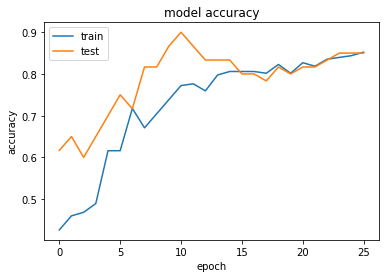

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_test_label = y_test_std.to_numpy()
[loss, ann_accuracy, precision, recall] = model_ann.evaluate(X_test_data, y_test_label, verbose=0)

print("accuracy: " , ann_accuracy*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("F1 score: " , (2*(precision*recall)/(precision+recall))*100)

accuracy:  89.99999761581421
precision:  89.99999761581421
recall:  94.73684430122375
F1 score:  92.30769209607813


**ANN for feature selected dataset**

In [ ]:
model_ann_fs = build_ann_model(X_train_data_fs.shape[1]) #11
model_ann_fs.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 Dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 Dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

In [ ]:
history_fs = model_ann_fs.fit(X_train_data_fs, y_train_label, epochs=EPOCHS,
                    batch_size = 32, verbose=1, validation_data=(X_test_std_fs,y_test_std), callbacks = [earlystopping])

Epoch 1/100
8/8 [==============================] - 2s 64ms/step - loss: 0.7175 - accuracy: 0.4219 - precision_1: 0.4167 - recall_1: 0.9596 - val_loss: 0.6475 - val_accuracy: 0.6333 - val_precision_1: 0.6333 - val_recall_1: 1.0000
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7079 - accuracy: 0.4304 - precision_1: 0.4174 - recall_1: 0.9192 - val_loss: 0.6450 - val_accuracy: 0.6333 - val_precision_1: 0.6333 - val_recall_1: 1.0000
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4768 - precision_1: 0.4390 - recall_1: 0.9091 - val_loss: 0.6426 - val_accuracy: 0.6500 - val_precision_1: 0.6441 - val_recall_1: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6802 - accuracy: 0.4768 - precision_1: 0.4332 - recall_1: 0.8182 - val_loss: 0.6405 - val_accuracy: 0.7167 - val_precision_1: 0.6981 - val_recall_1: 0.9737
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6794 - acc

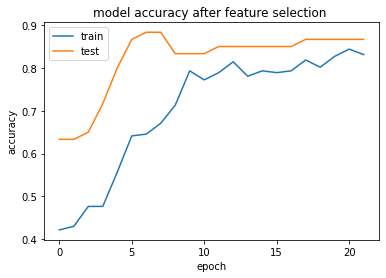

In [ ]:
plt.plot(history_fs.history['accuracy'])
plt.plot(history_fs.history['val_accuracy'])
plt.title('model accuracy after feature selection ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#y_test_label = y_test_std.to_numpy()
[loss, ann_accuracy_fs, precision_fs, recall_fs] = model_ann_fs.evaluate(X_test_data_fs, y_test_label, verbose=0)

print("accuracy: " , ann_accuracy_fs*100)
print("precision: " , precision_fs*100)
print("recall: " , recall_fs*100)
print("f1-score", (2*(precision_fs*recall_fs)/(precision_fs + recall_fs))*100)
#y_pred = model.predict(X_test_data_reshaped).flatten()

accuracy:  88.33333253860474
precision:  87.80487775802612
recall:  94.73684430122375
f1-score 91.13924136587373


# **CNN conv1D Classification**

### **Reshape the dataset from 2D to 3D**

### Original Dataset 

In [ ]:
sample_size = X_train_data.shape[0] # number of samples in train set
time_steps  = X_train_data.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_train_data_reshaped = X_train_data.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", X_train_data_reshaped.shape)
print("1 Sample shape:\n",X_train_data_reshaped[0].shape)
print("An example sample:\n", X_train_data_reshaped[0])

After reshape train data set shape:
 (237, 20, 1)
1 Sample shape:
 (20, 1)
An example sample:
 [[0.29166667]
 [0.30232558]
 [0.11643836]
 [0.        ]
 [0.3740458 ]
 [1.        ]
 [0.40322581]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]]


In [ ]:
X_test_data_reshaped = X_test_data.reshape(X_test_data.shape[0],X_test_data.shape[1],1)
print("After reshape test data set shape:\n", X_test_data_reshaped.shape)
print("1 Sample shape:\n",X_test_data_reshaped[0].shape)
print("An example sample:\n", X_test_data_reshaped[0])

After reshape test data set shape:
 (60, 20, 1)
1 Sample shape:
 (20, 1)
An example sample:
 [[0.52083333]
 [0.65116279]
 [0.24200913]
 [0.        ]
 [0.71755725]
 [0.        ]
 [0.25806452]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]]


### Featured Selected dataset

In [ ]:
sample_size = X_train_data_fs.shape[0] # number of samples in train set
time_steps  = X_train_data_fs.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

X_train_data_fs_reshaped = X_train_data_fs.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", X_train_data_fs_reshaped.shape)
print("1 Sample shape:\n",X_train_data_fs_reshaped[0].shape)
print("An example sample:\n", X_train_data_fs_reshaped[0])

After reshape train data set shape:
 (237, 11, 1)
1 Sample shape:
 (11, 1)
An example sample:
 [[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


In [ ]:
X_test_data_fs_reshaped = X_test_data_fs.reshape(X_test_data_fs.shape[0],X_test_data_fs.shape[1],1)
print("After reshape test data set shape:\n", X_test_data_fs_reshaped.shape)
print("1 Sample shape:\n",X_test_data_fs_reshaped[0].shape)
print("An example sample:\n", X_test_data_fs_reshaped[0])

After reshape test data set shape:
 (60, 11, 1)
1 Sample shape:
 (11, 1)
An example sample:
 [[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


## Conv1D model

In [ ]:
def build_conv1D_model(no_of_features):
    #n_timesteps = X_train_data_reshaped.shape[1] #20
    n_timesteps = no_of_features #20 #11
    n_features  = X_train_data_reshaped.shape[2] #1 
   
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))

    model.add(Conv1D(filters=8, kernel_size=6, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters=16, kernel_size=4, activation='relu', name="Conv1D_2"))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_3"))
    #model.add(Conv1D(filters=16, kernel_size=6, activation='relu', name="Conv1D_4"))
    #model.add(Conv1D(filters=16, kernel_size=4, activation='relu', name="Conv1D_5"))
    
  
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="Dense_1"))
    model.add(Dense(1, activation='sigmoid'))

    #optimizer = tf.keras.optimizers.RMSprop(0.001) #adam

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) #adam
    return model

model_conv1D = build_conv1D_model(X_train_data_reshaped.shape[1]) #20
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 15, 8)             56        
                                                                 
 dropout_4 (Dropout)         (None, 15, 8)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 12, 16)            528       
                                                                 
 dropout_5 (Dropout)         (None, 12, 16)            0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 11, 32)            1056      
                                                                 
 MaxPooling1D_3 (MaxPooling1  (None, 5, 32)            0         
 D)                                                              
                                                      

In [ ]:
history = model_conv1D.fit(X_train_data_reshaped, y_train_label, epochs=EPOCHS,
                    batch_size = 32, verbose=1, validation_data=(X_test_std,y_test_std), callbacks = [earlystopping])

Epoch 1/100
8/8 [==============================] - 2s 76ms/step - loss: 0.6918 - accuracy: 0.5359 - precision_2: 0.4000 - recall_2: 0.2222 - val_loss: 0.7093 - val_accuracy: 0.3667 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.5823 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.7134 - val_accuracy: 0.3667 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6711 - accuracy: 0.5823 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.7247 - val_accuracy: 0.3667 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6682 - accuracy: 0.5823 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.7364 - val_accuracy: 0.3667 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/100
8/8 [==========

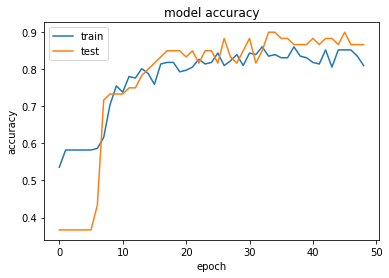

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
[loss, cnn_accuracy, precision, recall] = model_conv1D.evaluate(X_test_data_reshaped, y_test_label, verbose=0)

print("accuracy: " , cnn_accuracy*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("F1 score: " , (2*(precision*recall)/(precision+recall))*100)
#y_pred = model.predict(X_test_data_reshaped).flatten()

accuracy:  89.99999761581421
precision:  94.44444179534912
recall:  89.47368264198303
F1 score:  91.89188981073629


### **For dataset with selected features**

In [ ]:
def build_conv1D_model_fs(no_of_features):
    #n_timesteps = X_train_data_reshaped.shape[1] #20
    n_timesteps = no_of_features #20 #11
    n_features  = X_train_data_reshaped.shape[2] #1 
   
    model = Sequential(name="model_conv1D")
    model.add(Input(shape=(n_timesteps,n_features)))

    model.add(Conv1D(filters=8, kernel_size=6, activation='relu', name="Conv1D_1"))
    model.add(Dropout(0.2))
    
    model.add(Conv1D(filters=16, kernel_size=4, activation='relu', name="Conv1D_2"))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', name="Conv1D_3"))
    #model.add(Conv1D(filters=18, kernel_size=3, activation='relu', name="Conv1D_4"))
    #model.add(Conv1D(filters=16, kernel_size=4, activation='relu', name="Conv1D_5"))
    
  
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))
    model.add(Flatten())
    model.add(Dense(32, activation='relu', name="Dense_1"))
    model.add(Dense(1, activation='sigmoid'))

    #optimizer = tf.keras.optimizers.RMSprop(0.001) #adam

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) #adam
    return model


In [ ]:
X_train_data_fs_reshaped.shape[1]

11

In [ ]:
model_conv1D_fs = build_conv1D_model_fs(X_train_data_fs_reshaped.shape[1]) #11
model_conv1D_fs.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 6, 8)              56        
                                                                 
 dropout_6 (Dropout)         (None, 6, 8)              0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 16)             528       
                                                                 
 dropout_7 (Dropout)         (None, 3, 16)             0         
                                                                 
 Conv1D_3 (Conv1D)           (None, 2, 32)             1056      
                                                                 
 MaxPooling1D_3 (MaxPooling1  (None, 1, 32)            0         
 D)                                                              
                                                      

In [ ]:
history_fs = model_conv1D_fs.fit(X_train_data_fs_reshaped, y_train_label, epochs=EPOCHS,
                    batch_size = 32, verbose=1, validation_data=(X_test_std_fs,y_test_std),callbacks = [earlystopping])

Epoch 1/100
8/8 [==============================] - 2s 72ms/step - loss: 0.6902 - accuracy: 0.5570 - precision_3: 0.2857 - recall_3: 0.0404 - val_loss: 0.7028 - val_accuracy: 0.3667 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5823 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.7034 - val_accuracy: 0.3667 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6764 - accuracy: 0.5823 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.7063 - val_accuracy: 0.3667 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.5823 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 0.7058 - val_accuracy: 0.3667 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/100
8/8 [==========

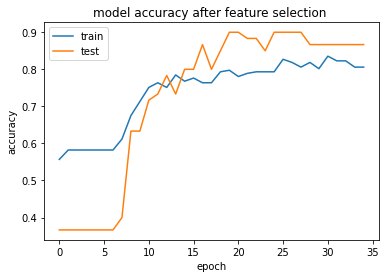

In [ ]:
plt.plot(history_fs.history['accuracy'])
plt.plot(history_fs.history['val_accuracy'])
plt.title('model accuracy after feature selection ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#y_test_label = y_test_std.to_numpy()
[loss, cnn_accuracy_fs, precision_fs, recall_fs] = model_conv1D_fs.evaluate(X_test_data_fs_reshaped, y_test_label, verbose=0)

print("accuracy: " , cnn_accuracy_fs*100)
print("precision: " , precision_fs*100)
print("recall: " , recall_fs*100)
print("f1-score", (2*(precision_fs*recall_fs)/(precision_fs + recall_fs))*100)
#y_pred = model.predict(X_test_data_reshaped).flatten()

accuracy:  89.99999761581421
precision:  97.0588207244873
recall:  86.84210777282715
f1-score 91.66666681383855


In [ ]:
print(model_accuracy_fs)

[0.8833333333333333, 0.8333333333333334, 0.8833333333333333, 0.8833333333333333, 0.8666666666666667, 0.85, 0.85, 0.8833333333333333, 0.8833333333333333, 0.8333333333333334]


# **Visualization**

In [ ]:
classifier_names.append('ANN')
if(ann_accuracy > ann_accuracy_fs):
    model_accuracy.append(ann_accuracy_fs)
    model_accuracy_fs.append(ann_accuracy)
else:
    model_accuracy.append(ann_accuracy)
    model_accuracy_fs.append(ann_accuracy_fs)

In [ ]:
'''
model_accuracy.append(ann_accuracy)
model_accuracy_fs.append(ann_accuracy_fs)
classifier_names.append('ANN')
'''

"\nmodel_accuracy.append(ann_accuracy)\nmodel_accuracy_fs.append(ann_accuracy_fs)\nclassifier_names.append('ANN')\n"

In [ ]:
classifier_names.append('CNN')
if(cnn_accuracy > cnn_accuracy_fs):
    model_accuracy.append(cnn_accuracy_fs)
    model_accuracy_fs.append(cnn_accuracy)
else:    
    model_accuracy.append(cnn_accuracy)
    model_accuracy_fs.append(cnn_accuracy_fs)

In [ ]:
'''
model_accuracy.append(cnn_accuracy)
model_accuracy_fs.append(cnn_accuracy_fs)
classifier_names.append('CNN')
'''

"\nmodel_accuracy.append(cnn_accuracy)\nmodel_accuracy_fs.append(cnn_accuracy_fs)\nclassifier_names.append('CNN')\n"

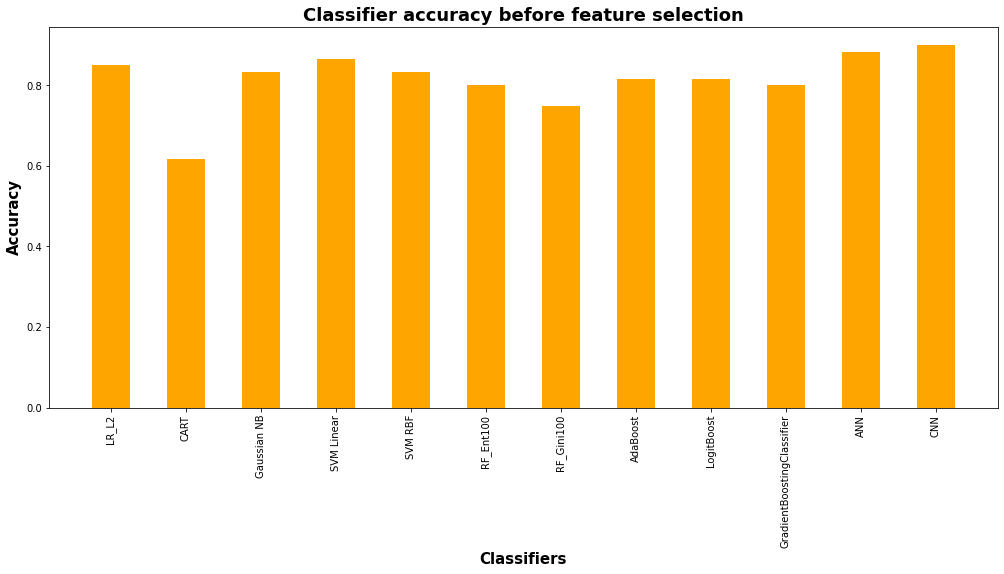

In [ ]:
fig = plt.figure(figsize = (17, 7))
plt.ylabel('Accuracy',fontweight ='bold', fontsize = 15)
plt.xlabel('Classifiers',fontweight ='bold', fontsize = 15)
plt.title('Classifier accuracy before feature selection',fontweight ='bold', fontsize = 18)

plt.bar(classifier_names, model_accuracy, color ='orange', width = 0.5)
plt.xticks(range(len(classifier_names)), classifier_names, rotation ='vertical')
plt.show()

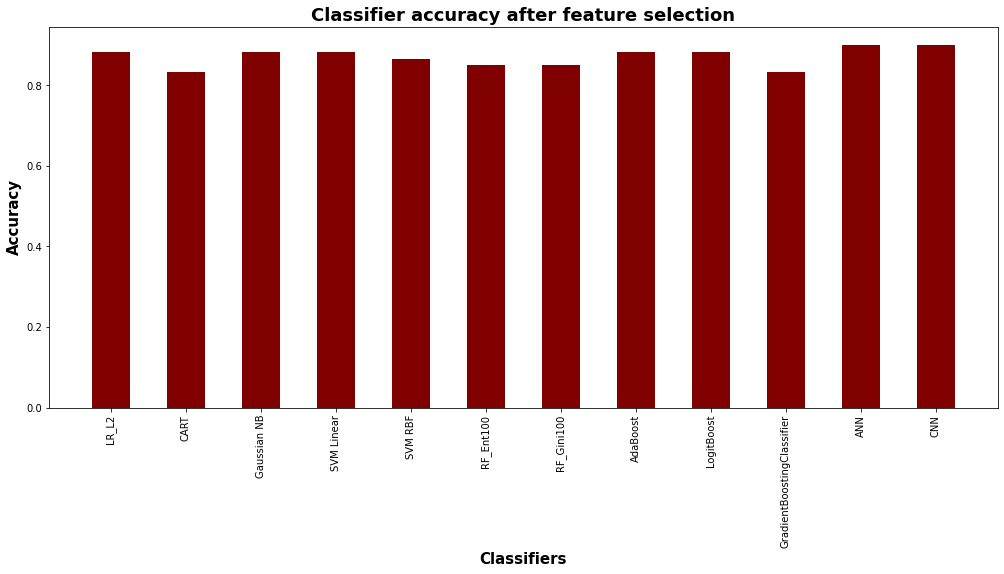

In [ ]:
fig = plt.figure(figsize = (17, 7))
plt.ylabel('Accuracy',fontweight ='bold', fontsize = 15)
plt.xlabel('Classifiers',fontweight ='bold', fontsize = 15)
plt.title('Classifier accuracy after feature selection',fontweight ='bold', fontsize = 18)

plt.bar(classifier_names, model_accuracy_fs, color ='maroon', width = 0.5)
plt.xticks(range(len(classifier_names)), classifier_names, rotation ='vertical')
plt.show()

In [ ]:
model_accuracy_diff.append(abs(ann_accuracy_fs - ann_accuracy)) 

In [ ]:
model_accuracy_diff.append(abs(cnn_accuracy_fs - cnn_accuracy))   

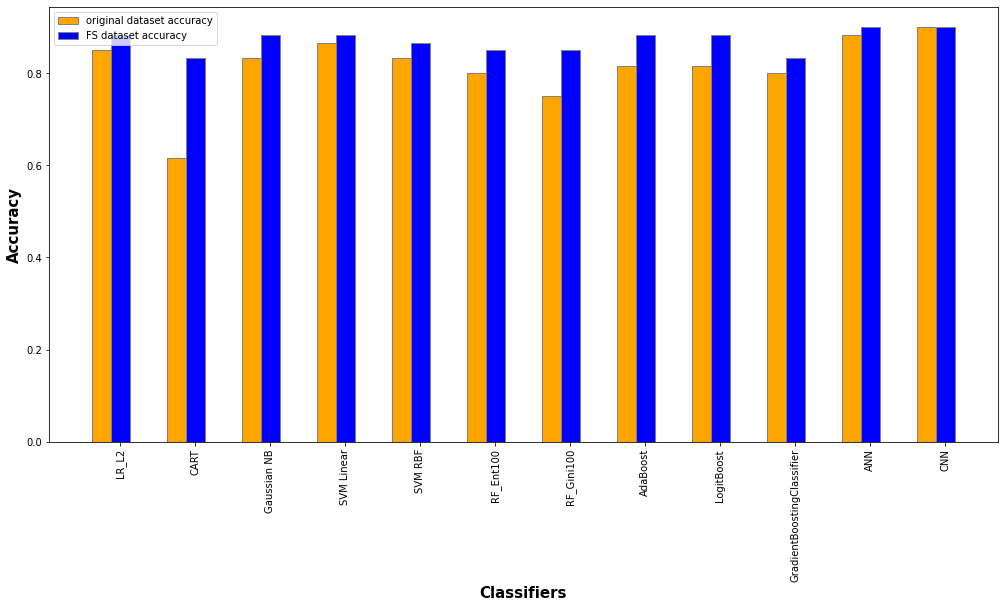

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(17, 8))

#bar1 - model_accuracy
#bar2 -model_accuracy_fs
#bar3 - model_accuracy_diff
 
# Set position of bar on X axis
br1 = np.arange(len(model_accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, model_accuracy, color ='orange', width = barWidth,
        edgecolor ='grey', label ='original dataset accuracy')
plt.bar(br2, model_accuracy_fs, color ='blue', width = barWidth,
        edgecolor ='grey', label ='FS dataset accuracy')
#plt.bar(br3, model_accuracy_diff, color ='maroon', width = barWidth,
#        edgecolor ='grey', label ='Difference in accuracy')
 
# Adding Xticks
plt.xlabel('Classifiers', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(classifier_names))],
        classifier_names, rotation ='vertical')
 
plt.legend(loc = 'upper left')
plt.show()